# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**RF & RF+ICE**](#RF-&-RF+ICE)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [4]:
def plot_Ba(nav_lon, nav_lat, Ba_masked, lev, cmap, ax):
    proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_masked, lev, cmap=cmap, extend='both')
    proj.contour(x, y, Ba_masked, lev, linewidths=1.5, colors=('gray',))
    # Frame
    proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    return CS

In [5]:
boundary_name=glob.glob('_data/Exchange/TRC_BOUND.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
domain=Boundary_Mat['domain']

In [6]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_Ba.mat')
Ba_orca = MAT['Ba_ini_orca'][:]

# RF & RF+ICE

In [7]:
L = 0
ptrc_obj1 = nc.Dataset('_data\RF01_1m_19920711_19961222_ptrc_T.nc')
ptrc_obj2 = nc.Dataset('_data\FD01_1m_19920711_19960819_ptrc_T.nc')
Ba1=ptrc_obj1.variables['Ba'][:]*1e-6
Ba2=ptrc_obj2.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj1.variables['nav_lat'][:]
nav_lon=ptrc_obj1.variables['nav_lon'][:]

In [8]:
Ba1_masked = np.ma.masked_where(((domain==0) | (Ba1[-1, L, :, :]==0)), Ba1[-1, L, :, :])
Ba2_masked = np.ma.masked_where(((domain==0) | (Ba2[-1, L, :, :]==0)), Ba2[-1, L, :, :])

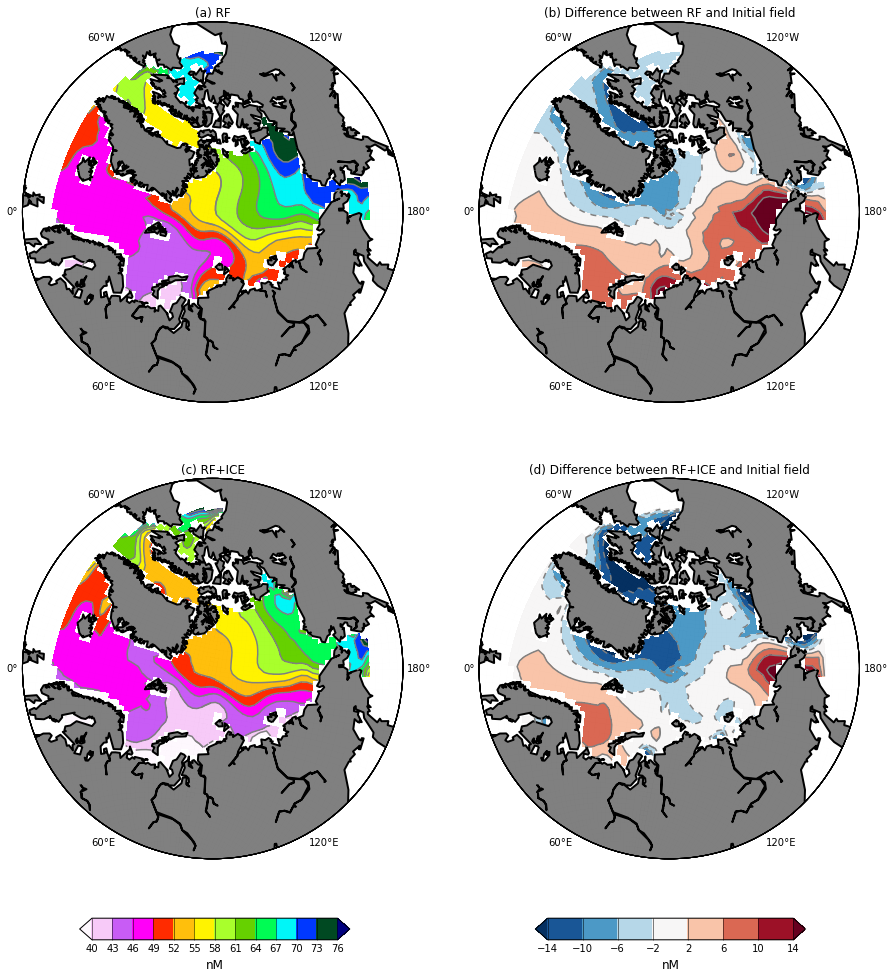

In [9]:
lev1 = range(40, 79, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, Ba1_masked, lev1, plt.cm.gist_ncar_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, Ba1_masked-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, Ba2_masked, lev1, plt.cm.gist_ncar_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, Ba2_masked-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax4)
# Title
ax1.set_title('(a) RF'); ax2.set_title('(b) Difference between RF and Initial field')
ax3.set_title('(c) RF+ICE'); ax4.set_title('(d) Difference between RF+ICE and Initial field')
# Legend
cax1  = fig.add_axes([0.178, 0.05, 0.25, 0.02])
CBar1 = fig.colorbar(CS1, cax=cax1, orientation='horizontal')
CBar1.set_label('nM', fontsize=12)
CBar1.ax.tick_params(axis='x', length=22)
CBar1.set_ticks(lev1)

cax2  = fig.add_axes([0.6, 0.05, 0.25, 0.02])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

In [10]:
BC1 = Ba1[:, 0, 125, 55]
MK1 = Ba1[:, 0, 131, 67]
OB1 = Ba1[:, 0, 145, -32]
FS1 = Ba1[:, 0, 135, -48]
#
BC2 = Ba2[:, 0, 125, 55]
MK2 = Ba2[:, 0, 131, 67]
OB2 = Ba2[:, 0, 145, -32]
FS2 = Ba2[:, 0, 135, -48]

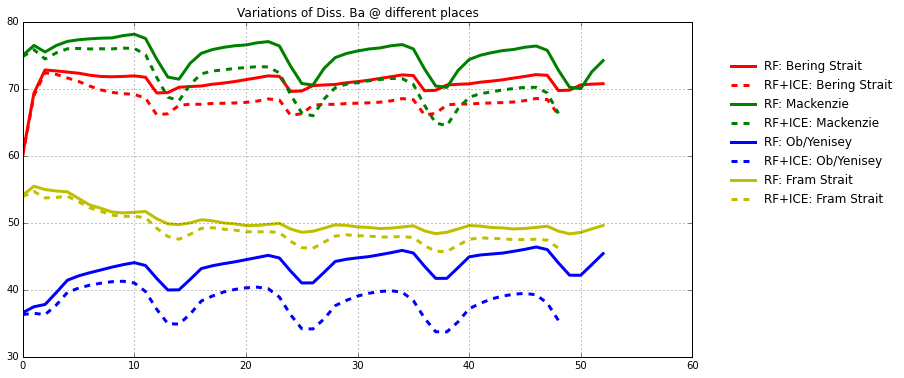

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca();ax.grid()
ax.plot(BC1, 'r-', lw=3, label='RF: Bering Strait')
ax.plot(BC2, 'r--', lw=3, label='RF+ICE: Bering Strait')

ax.plot(MK1, 'g-', lw=3, label='RF: Mackenzie')
ax.plot(MK2, 'g--', lw=3, label='RF+ICE: Mackenzie')

ax.plot(OB1, 'b-', lw=3, label='RF: Ob/Yenisey')
ax.plot(OB2, 'b--', lw=3, label='RF+ICE: Ob/Yenisey')

ax.plot(FS1, 'y-', lw=3, label='RF: Fram Strait')
ax.plot(FS2, 'y--', lw=3, label='RF+ICE: Fram Strait')

#ax.plot(BC4, 'g-', lw=3, label='ICE')
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title('Variations of Diss. Ba @ different places')

In [47]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_d18O.mat')
d18O_orca = MAT['d18O_ini_orca'][:]

In [48]:
L = 0
ptrc_obj1 = nc.Dataset('_data\FD01_1m_19920711_19960819_ptrc_T.nc')
d18O=ptrc_obj1.variables['d18O'][:]*1e-6

In [51]:
d18O_masked = np.ma.masked_where(((domain==0) | (Ba1[-1, L, :, :]==0)), d18O[-1, L, :, :])
d18O_masked = (d18O_masked/2005.2-1)*1000

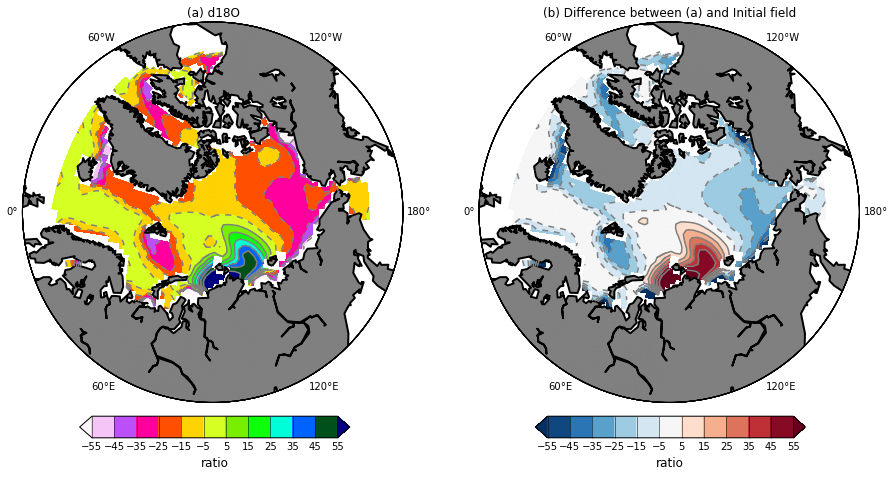

In [52]:
lev1 = [-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55]
lev2 = [-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55]

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, d18O_masked, lev1, plt.cm.gist_ncar_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, d18O_masked-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax2)
# Title
ax1.set_title('(a) d18O'); ax2.set_title('(b) Difference between (a) and Initial field')
# Legend
cax1  = fig.add_axes([0.178, 0.515, 0.25, 0.02])
CBar1 = fig.colorbar(CS1, cax=cax1, orientation='horizontal')
CBar1.set_label('ratio', fontsize=12)
CBar1.ax.tick_params(axis='x', length=22)
CBar1.set_ticks(lev1)

cax2  = fig.add_axes([0.6, 0.515, 0.25, 0.02])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('ratio', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

In [32]:
np.nanmax(d18O_masked)

69.148186

In [33]:
np.nanmin(d18O_masked)

-292.2529

In [38]:
BC1 = (d18O[:, 0, 125, 55]/2005.2-1)*1000
MK1 = (d18O[:, 0, 131, 67]/2005.2-1)*1000
OB1 = (d18O[:, 0, 145, -32]/2005.2-1)*1000
FS1 = (d18O[:, 0, 135, -48]/2005.2-1)*1000

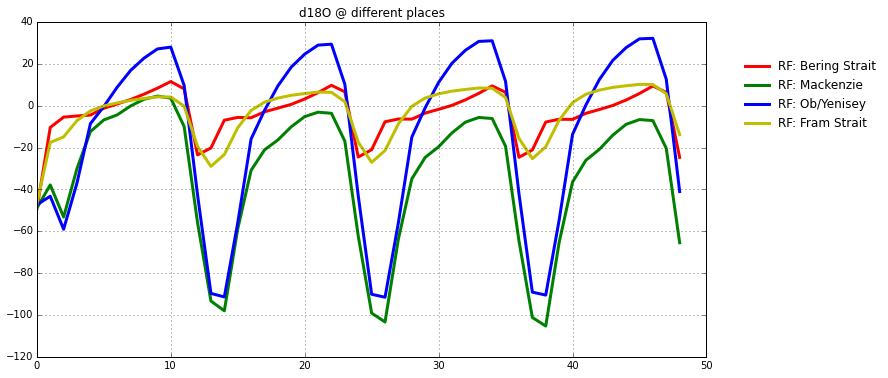

In [41]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca();ax.grid()
ax.plot(BC1, 'r-', lw=3, label='RF: Bering Strait')
ax.plot(MK1, 'g-', lw=3, label='RF: Mackenzie')
ax.plot(OB1, 'b-', lw=3, label='RF: Ob/Yenisey')
ax.plot(FS1, 'y-', lw=3, label='RF: Fram Strait')
#ax.plot(BC4, 'g-', lw=3, label='ICE')
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title('d18O @ different places')